In [1]:
# Load Libraries

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
from keras.models import load_model
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

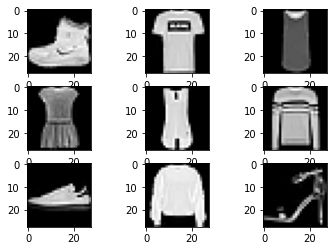

In [2]:
from matplotlib import pyplot as plt
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
plt.show()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Preprocessing data
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32')
x_train = x_train/ 255    #scale pixel into (0-1)

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32')
x_test = x_test/ 255     #scale pixel into (0-1)

# one-hot output || 1: pos || 0:neg
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
# Model
# Create model
model = Sequential()

# Build Layer
model.add(Conv2D(32,(3,3),padding = 'same',activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),padding = 'same',activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [8]:
# Create optimize
sgd = SGD(lr = 0.1, momentum = 0.95)
model.compile(loss = 'binary_crossentropy',optimizer = sgd, metrics = ['accuracy'])

CNN = model.fit(x_train,y_train,batch_size=124,epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20


C:\Users\ad\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


388/388 [==============================] - 137s 351ms/step - loss: 0.1551 - accuracy: 0.6820 - val_loss: 0.1211 - val_accuracy: 0.7622
Epoch 2/20
388/388 [==============================] - 148s 381ms/step - loss: 0.0781 - accuracy: 0.8409 - val_loss: 0.0766 - val_accuracy: 0.8533
Epoch 3/20
388/388 [==============================] - 144s 372ms/step - loss: 0.0677 - accuracy: 0.8637 - val_loss: 0.0692 - val_accuracy: 0.8604
Epoch 4/20
388/388 [==============================] - 147s 380ms/step - loss: 0.0612 - accuracy: 0.8778 - val_loss: 0.0615 - val_accuracy: 0.8773
Epoch 5/20
388/388 [==============================] - 144s 370ms/step - loss: 0.0564 - accuracy: 0.8868 - val_loss: 0.0581 - val_accuracy: 0.8922
Epoch 6/20
388/388 [==============================] - 157s 405ms/step - loss: 0.0540 - accuracy: 0.8917 - val_loss: 0.0523 - val_accuracy: 0.8982
Epoch 7/20
388/388 [==============================] - 146s 375ms/step - loss: 0.0509 - accuracy: 0.8984 - val_loss: 0.0559 - val_accura

In [10]:
score = model.evaluate(x_test,y_test,verbose = 10)
print('Test score:',score[0])
print('Test accuracy:',score[1])

Test score: 0.038852907717227936
Test accuracy: 0.9243999719619751


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


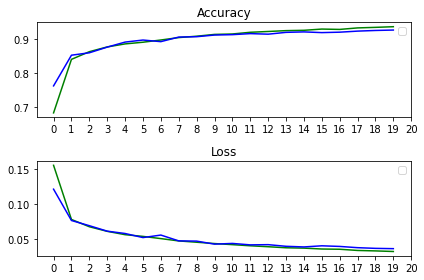

In [11]:
import numpy as np

# Accuracy
plt.subplot(211)
plt.title('Accuracy')
plt.plot(CNN.history['accuracy'],color = 'g')
plt.plot(CNN.history['val_accuracy'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,21,1))

# Loss
plt.subplot(212)
plt.title('Loss')
plt.plot(CNN.history['loss'],color = 'g')
plt.plot(CNN.history['val_loss'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,21,1))

plt.tight_layout()
plt.show()

Position of number:234
1/1 [==============================] - 0s 17ms/step


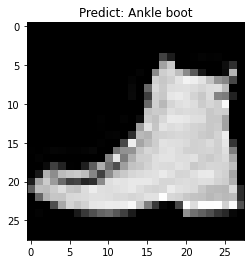

In [18]:
# Predict
Label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num = int(input('Position of number:'))
num_predict = np.argmax(model.predict(x_test[num].reshape((-1,28,28,1))))
plt.title("Predict: " + str(Label[num_predict]))
plt.imshow(x_test[num],cmap=plt.get_cmap('gray'))